# INSTALL ET IMPORT

In [9]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# RECUPERATION ET CLEAN DES DONNEES

### Fonctions

In [3]:
#### FONCTIONS
## retourne un dataframe a partir dun string
def getDfFromString(str):
    str = str.replace(' ', '')
    str = str[1:-1]
    tab = str.split(',')
    df = pd.DataFrame(tab, columns = ['PRICE'])
    df.drop(df[df['PRICE'] == 'None'].index, inplace = True)
    df['PRICE'] = pd.to_numeric(df['PRICE'])
   
    return df

## retourne true si le trade aurait fonctionner avec un autre stop loss et un autre take profit avec la stratégie de base
def checkOtherRatios(enterPrice, candles, SLRatio, TPRatio):
    SL = enterPrice - enterPrice*SLRatio
    TP = enterPrice + enterPrice*TPRatio
    for index, row in candles.iterrows():
              if (row['PRICE'] <= SL):
                  return False            
              elif (row['PRICE'] >= TP):
                  return True                  
    # return None

## retourne le prix de sortie du trade en entrée avec la stratégie classique
def getPriceWithOtherRatio(enterPrice, candles, SLRatio, TPRatio):
    SL = enterPrice - enterPrice*SLRatio
    TP = enterPrice + enterPrice*TPRatio
    for index, row in candles.iterrows():
              if (row['PRICE'] <= SL):
                  return SL            
              elif (row['PRICE'] >= TP):
                  return TP                  
    return None

## retourne le prix de sortie du trade en entrée avec la stratégie suiveuse
def getPriceWithOtherRatioStrategieSuiveuse(enterPrice, candles, SLRatio, TPRatio):
    SL = enterPrice - enterPrice*SLRatio
    TP = enterPrice + enterPrice*TPRatio
    for index, row in candles.iterrows():
              if (row['PRICE'] <= SL):
                  return SL            
              elif (row['PRICE'] >= TP):
                  SL = TP
                  TP = TP+TP*(TPRatio/5)                  
    return None

## affiche les statistiques 'basique' de l'ensemble des trades           
def printBasicStats(df):
    print('####### BASIC STATS'.format(df))
    print('## SHAPE: ', df.shape)
    print('## RATIO W/L: ', df['RESULT'].mean())
    print('## LONGUEUR DE BOUGIE 1H:', df['CANDLE_LENGTH'].mean())
    print('## LONGUEUR DE BOUGIE 24H:', df['DAY_PERCENT'].mean())
    print('## RATIO 24H/1H:', df['CANDLE_RATIO'].mean())
    print('## TIME IN TRADE', df['TIME_IN_TRADE'].mean())
    print('\n')

## convertis la données TIME_IN_TRADE du csv en secondes
def dateToSeconds(date):
    base = pd.to_datetime("00:00:00.000000")
    time = pd.to_datetime(str(date).split(", ")[1])
    diff = pd.to_datetime(str(base-time).split("days +")[1])

    return (diff.hour*3600 + diff.minute*60 + diff.second)

### Recuperation du/des dataset(s)

In [4]:
# get dataset
df = pd.read_csv('trade_history/trade_history.csv', sep='|')

In [197]:
# get dataset
df0 = pd.read_csv('trade_history/trade_history.csv', sep='|')
df1 = pd.read_csv('trade_history/trade_history1.csv', sep='|')
df2 = pd.read_csv('trade_history/trade_history2.csv', sep='|')
df3 = pd.read_csv('trade_history/trade_history3.csv', sep='|')


df = pd.concat([df0, df1, df2, df3])

In [5]:
# clean dataset
#df = df.dropna()
df['CANDLE_LENGTH'] = (pd.to_numeric(df['CANDLE_LENGTH'])-1)*100
df['RESULT'] = pd.to_numeric(df['RESULT'])
df['CANDLE_RATIO'] = df['DAY_PERCENT']/df['CANDLE_LENGTH']
df['ENTER_PRICE'] = pd.to_numeric(df['ENTER_PRICE'])
df['TP_RATIO'] = pd.to_numeric(df['TP_RATIO'])
df['SL_RATIO'] = pd.to_numeric(df['SL_RATIO'])
df['TIME_IN_TRADE'] = df['TIME_IN_TRADE'].apply(lambda x: dateToSeconds(x))

In [7]:
print(df["TP_RATIO"].min())
print(df["TP_RATIO"].max())
print(df["SL_RATIO"].min())
print(df["SL_RATIO"].max())

0.02
0.02
0.0001
0.0001


In [6]:
df.shape

(292, 17)

In [106]:
# delete les lignes non concercné
df.drop(df[df['TP_RATIO'] <= 0.03].index, inplace = True)
# df.drop(df[df['SL_RATIO'] <= 0.005].index, inplace = True)
df.drop(df[df['SL_RATIO'] != 0.01].index, inplace = True)

df

,TIME,SYMBOL,ENTER_PRICE,TAKE_PROFIT,STOP_LOSS,RESULT,CANDLE_LENGTH,TP_RATIO,SL_RATIO,DAY_PERCENT,TIME_IN_TRADE,ATH,ATL,TAB_PRICES,LAST_24HOUR,TAB_TIMES,CANDLE_RATIO


# TRAITEMENT ET ANALYSE DES DONNEES

#### BASIC PRINTS

In [8]:
# BASIC PRINTS

dfWin = df[df['RESULT'] == 1]
dfLoose = df[df['RESULT'] == 0]

printBasicStats(df)
printBasicStats(dfWin)
printBasicStats(dfLoose)


####### BASIC STATS
## SHAPE:  (292, 17)
## RATIO W/L:  0.03767123287671233
## LONGUEUR DE BOUGIE 1H: 4.041572308650058
## LONGUEUR DE BOUGIE 24H: 16.895065068493153
## RATIO 24H/1H: 4.951765222239587
## TIME IN TRADE 30.839041095890412


####### BASIC STATS
## SHAPE:  (11, 17)
## RATIO W/L:  1.0
## LONGUEUR DE BOUGIE 1H: 5.963577015078342
## LONGUEUR DE BOUGIE 24H: 21.199272727272724
## RATIO 24H/1H: 5.415998980603186
## TIME IN TRADE 133.9090909090909


####### BASIC STATS
## SHAPE:  (281, 17)
## RATIO W/L:  0.0
## LONGUEUR DE BOUGIE 1H: 3.9663336902489505
## LONGUEUR DE BOUGIE 24H: 16.726572953736653
## RATIO 24H/1H: 4.9335923704887
## TIME IN TRADE 26.80427046263345




#### Definition des meilleurs parametres

2
12
1.0255449112399877
1044.7674605468517


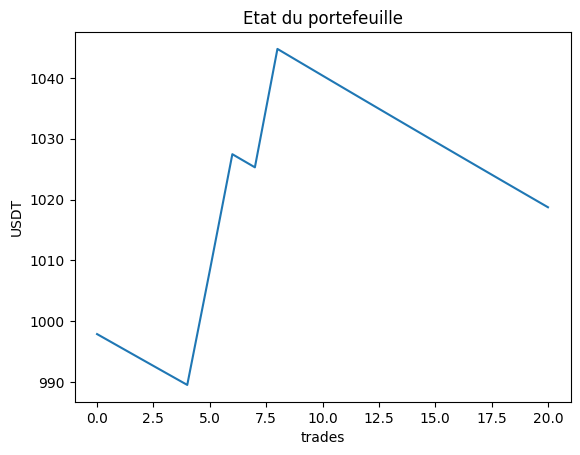

In [11]:
# Montre un graphique de l'état du portefeuille après chaque trade selon les 4 parametres choisis (SLRatio, TPRatio, bougie1h, bougie24h)

usdt = 1000
simpleSLRatio = 0.0001
simpleTPRatio = 0.02
simpleBougie1h = 8
simpleBougie24h = 8
tabTune = []

maxUsdt = 0
minUsdtToken = 0
minUsdt = 0
maxDrawBack = 0

winToken = 0
lossToken = 0

mostWinInARowToken = 0
mostWinInARow = 0
mostLossInARowToken = 0
mostLossInARow = 0

for index, row in df.iterrows():
        #print(df['TAB_PRICES'][index])
        # On test le nouveau parametre bougie 1h (CANDLE LENGTH dans le csv)
        if row["CANDLE_LENGTH"] >= simpleBougie1h:
            # On test le nouveau parametre bougie 1h (DAY PERCENT dans le csv)
            if row["DAY_PERCENT"] >= simpleBougie24h:           
                if checkOtherRatios(row['ENTER_PRICE'], getDfFromString(row['TAB_PRICES']), simpleSLRatio, simpleTPRatio):
                    usdt = usdt+usdt*simpleTPRatio
                    usdt = usdt-usdt*0.001
                    # Detection nombre de trade gagnant d'affilé
                    winToken = 1
                    lossToken = 0
                    if winToken:
                         mostWinInARowToken += 1
                         mostLossInARowToken = 0
                         if mostWinInARowToken > mostWinInARow:
                              mostWinInARow = mostWinInARowToken                         
                else:
                    usdt = usdt-usdt*simpleSLRatio
                    usdt = usdt-usdt*0.002
                    # Detection nombre de trade perdant d'affilé
                    winToken = 0
                    lossToken = 1
                    if lossToken:
                         mostLossInARowToken += 1
                         mostWinInARowToken = 0 
                         if mostLossInARowToken > mostLossInARow:
                              mostLossInARow = mostLossInARowToken

                tabTune.append(usdt)
                # Detection du plus gros drawback
                if usdt > maxUsdt:
                     maxUsdt = usdt
                if (maxUsdt / usdt) > maxDrawBack:
                     maxDrawBack = (maxUsdt / usdt)

print(mostWinInARow)
print(mostLossInARow)
print(maxDrawBack)
print(maxUsdt)

# taille de votre tableau
n = len(tabTune)

# creation du graphique
fig, ax = plt.subplots()
ax.plot(range(n), tabTune)

# ajout de légendes et de titres
ax.set_xlabel('trades')
ax.set_ylabel('USDT')
ax.set_title('Etat du portefeuille')

# affichage du graphique
plt.show()

In [12]:
# TESTS DES DIFFERENTS STOP LOSS / TAKE PROFIT
# DEFINITION DES PARAMETRES DE LA DETECTION DES MEILLEURS STOP LOSS / TAKE PROFIT
bestTPRatio = 0
bestSLRatio = 0
bestUsdt = 0
bestOk = 0
bestNok = 0

dfResult = pd.DataFrame(columns = ['1H', '24H', 'SL', 'TP', 'USDT', 'OK', 'NOK'])

# pour chaque bougie 1h
for bougie1h in range(2, 16, 2):
    # pour chaque bougie 24h
    for bougie24h in range(8, 9, 1):
        # pour chaque stop loss
        for i in range(1, 2, 1):    
            SLRatio = i*0.0001
            # pour chaque win
            for j in range(20, 21, 1):
                TPRatio = j*0.001
                ok = 0
                nok = 0
                usdt = 1000
                # df['RESULT_{0}_{1}'.format(SLRatio, TPRatio)] = None
                # pour chaque trade
                for index, row in df.iterrows():
                        #print(df['TAB_PRICES'][index])
                        # On test le nouveau parametre bougie 1h (CANDLE LENGTH dans le csv)
                        if row["CANDLE_LENGTH"] >= bougie1h:
                            # On test le nouveau parametre bougie 1h (DAY PERCENT dans le csv)
                            if row["DAY_PERCENT"] >= bougie24h:
                                # On test les nouveaux ratio de TP et SL                  
                                if checkOtherRatios(row['ENTER_PRICE'], getDfFromString(row['TAB_PRICES']), SLRatio, TPRatio):
                                    # df['RESULT_{0}_{1}'.format(SLRatio, TPRatio)][index] = 1
                                    ok += 1
                                    usdt = usdt+usdt*TPRatio
                                    usdt = usdt-usdt*0.001                
                                else:
                                    # df['RESULT_{0}_{1}'.format(SLRatio, TPRatio)][index] = 0
                                    nok += 1
                                    usdt = usdt-usdt*SLRatio
                                    usdt = usdt-usdt*0.002
                                    
                dfResult = dfResult.append({'1H': bougie1h, '24H': bougie24h, 'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt, 'OK': ok, 'NOK': nok}, ignore_index=True)

                # on sauvegarde le meilleur resultat
                if (usdt > bestUsdt):
                    bestUsdt = usdt
                    bestTPRatio = TPRatio
                    bestSLRatio = SLRatio
                    bestOk = ok
                    bestNok = nok
                    bestBougie1h = bougie1h
                    bestBougie24h = bougie24h
                
                print('Bougie 1h : {5}, SLRATIO: {0}, TPRATIO: {1}, USDT: {2}$ | {3}/{4}'.format(SLRatio, TPRatio, usdt, ok, nok, bougie1h))

C:\Users\Theoc\AppData\Local\Temp\ipykernel_24224\96616262.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'1H': bougie1h, '24H': bougie24h, 'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt, 'OK': ok, 'NOK': nok}, ignore_index=True)
C:\Users\Theoc\AppData\Local\Temp\ipykernel_24224\96616262.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'1H': bougie1h, '24H': bougie24h, 'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt, 'OK': ok, 'NOK': nok}, ignore_index=True)


Bougie 1h : 2, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 681.2398998899165$ | 11/281
Bougie 1h : 4, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 912.9428626645441$ | 6/97
Bougie 1h : 6, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 987.0093027327919$ | 4/42
Bougie 1h : 8, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 1018.7437420791468$ | 3/18
Bougie 1h : 10, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 1006.2092790798026$ | 1/6
Bougie 1h : 12, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 1008.3265631972041$ | 1/5
Bougie 1h : 14, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 1014.7051844378976$ | 1/2


C:\Users\Theoc\AppData\Local\Temp\ipykernel_24224\96616262.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'1H': bougie1h, '24H': bougie24h, 'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt, 'OK': ok, 'NOK': nok}, ignore_index=True)
C:\Users\Theoc\AppData\Local\Temp\ipykernel_24224\96616262.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'1H': bougie1h, '24H': bougie24h, 'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt, 'OK': ok, 'NOK': nok}, ignore_index=True)
C:\Users\Theoc\AppData\Local\Temp\ipykernel_24224\96616262.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'1H': bougie1h, '24H': bougie24h, 'SL': SLRatio, 'TP': TPRatio, 'USDT': u

In [14]:
# PRINT DES MEILLEURS PARAMETRES
print(dfResult.sort_values(by=["USDT"], ascending=False).head(40))
print('### BEST PERF')
print('1H: {5}, 24H: {6}, SLRATIO: {0}, TPRATIO: {1}, USDT: {2}$ | {3}/{4}'.format(bestSLRatio, bestTPRatio, bestUsdt, bestOk, bestNok, bestBougie1h, bestBougie24h))

     1H  24H      SL    TP         USDT    OK    NOK
3   8.0  8.0  0.0001  0.02  1018.743742   3.0   18.0
6  14.0  8.0  0.0001  0.02  1014.705184   1.0    2.0
5  12.0  8.0  0.0001  0.02  1008.326563   1.0    5.0
4  10.0  8.0  0.0001  0.02  1006.209279   1.0    6.0
2   6.0  8.0  0.0001  0.02   987.009303   4.0   42.0
1   4.0  8.0  0.0001  0.02   912.942863   6.0   97.0
0   2.0  8.0  0.0001  0.02   681.239900  11.0  281.0
### BEST PERF
1H: 8, 24H: 8, SLRATIO: 0.0001, TPRATIO: 0.02, USDT: 1018.7437420791468$ | 3/18


2


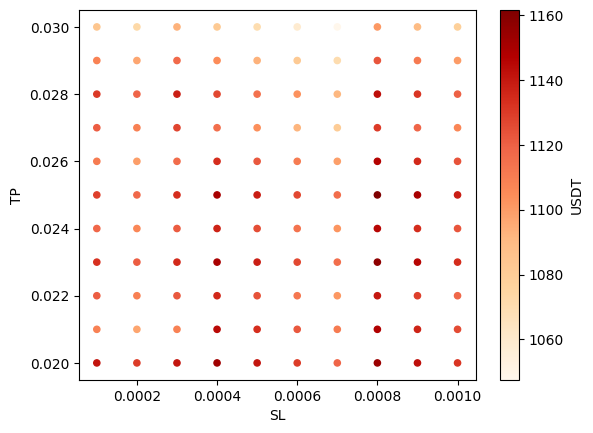

4


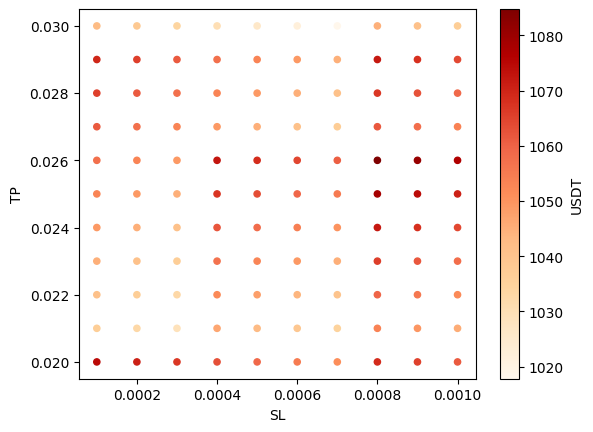

6


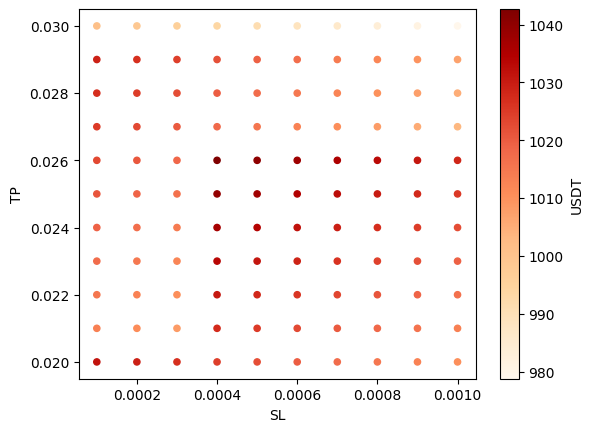

In [34]:
# PLOT DES MEILLEURS PARAMETRES SL ET TP (NE FONCTIONNE QUE POUR 2 PARAMETRE, SINON VOIR GRAPHIQUE 3D CI DESSOUS)
bougie1hAGarder = 2

# On affiche un graphe pour chaque valeur de bougie 1h
for i in range (0, 2, 2):
    # création du graphique
    dfPlotTpSl = dfResult[dfResult["1H"] == i]
    dfPlotTpSl.plot.scatter(x='SL', y='TP', c='USDT', colormap='OrRd')
    print(i)
    plt.show()

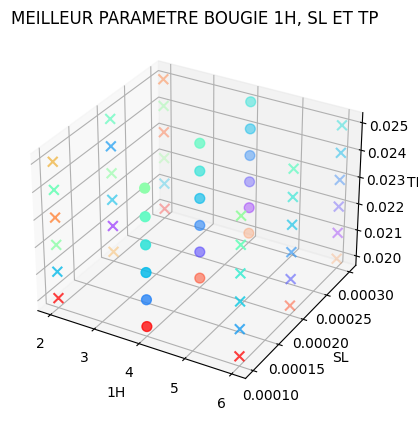

In [18]:
# PLOT 3D DES MEILLEUR PARAMETRES BOUGIE 1H, SL ET TP (NE MARCHE PAS)

markers = {2: 'x', 4:'o', 6:'x', 8:'o', 10:'x', 12:'o', 14:'x', 16:'o', 18:'x'}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# groupby sur la colonne 1H
grouped = dfResult.groupby(by='1H')

# pour chaque groupe
for i, group in grouped:
    sc = ax.scatter(group['1H'], group['SL'], group['TP'], c=group['USDT'], cmap='rainbow', marker=markers[i], s=50)

# ajout de légendes et de titres
ax.set_xlabel('1H')
ax.set_ylabel('SL')
ax.set_zlabel('TP')
ax.set_title('MEILLEUR PARAMETRE BOUGIE 1H, SL ET TP')

# affichage du graphique
plt.show()

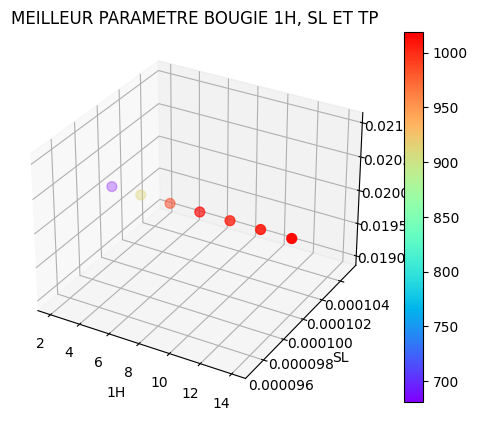

In [13]:
# PLOT 3D DES MEILLEUR PARAMETRES BOUGIE 1H, SL ET TP

# création du graphique
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(dfResult['1H'], dfResult['SL'], dfResult['TP'], c=dfResult['USDT'], cmap='rainbow', marker='o', s=50)

# ajout de légendes et de titres
ax.set_xlabel('1H')
ax.set_ylabel('SL')
ax.set_zlabel('TP')
ax.set_title('MEILLEUR PARAMETRE BOUGIE 1H, SL ET TP')

# ajout de la barre de couleur
fig.colorbar(sc)

# affichage du graphique
plt.show()

#### Longueurs des bougies 1H

In [15]:
### On cherche a savoir la meilleure valeur pour le parametre 'bougie 1h'. 
# Ce parametre permet de filter les cryptos gagnantes pour n'aller que sur celle qui sont en train d'augmenter depuis la derniere heure. 

# TEST DES LONGUEURS DE BOUGIE 1H (de 1.02 a 1.07)
bestLengthOK = 0
bestLength = 0
bestLengthRatio = 0
dfLengthResult = pd.DataFrame(columns = ["CANDLE_LENGTH", 'OK', 'NOK', 'RATIO'])

# pour chaque longueur de bougie
for i in range(1, 30, 1): 
    candleLength = i
    lengthOK = 0
    lengthNOK = 0
    lengthRatio = 0
    
    # pour chaque trade
    for index, row in df.iterrows():
        # On test la valeur du day percent afin de pouvoir comparé la combinaisaon daypercent / bougie 1h
        if (row["DAY_PERCENT"] >= 8):
            # si la longueur de bougie est comprise dans la section testé
            if (row["CANDLE_LENGTH"] >= candleLength):
                # On vérifie le resultat du trade en fonction des parametre SLRatio et TPRatio
                if checkOtherRatios(row['ENTER_PRICE'], getDfFromString(row['TAB_PRICES']), 0.0001, 0.02):
                    lengthOK += 1
                else:
                    lengthNOK += 1
    if lengthNOK == 0:
        lengthNOK += 1             
    lengthRatio = lengthOK/(lengthNOK+lengthOK)
    # on garde le meilleur resultat
    if lengthRatio > bestLengthRatio:
        bestLengthRatio = lengthRatio
        bestLengthOK = lengthOK
        bestLength = candleLength

    # on sauvegarde tout les resultats
    # dfLengthResult = dfLengthResult.append({"CANDLE_LENGTH": candleLengthUp - 0.01, 'OK': lengthOK, 'NOK': lengthNOK}, ignore_index=True)
    d = {"CANDLE_LENGTH": [candleLength], 'OK': [lengthOK], 'NOK': [lengthNOK], 'RATIO': [lengthRatio]}
    dfToAppend = pd.DataFrame(data=d)
    dfLengthResult = pd.concat((dfLengthResult, dfToAppend), axis=0)

In [16]:
# PRINT DES DIFFERENTES LONGUEURS DE BOUGIES
print(dfLengthResult)
print("bestLength", bestLength)
print("bestLengthOK", bestLengthOK, "bestLengthRatio", bestLengthRatio)

  CANDLE_LENGTH  OK  NOK     RATIO
0             1  11  281  0.037671
0             2  11  281  0.037671
0             3   7  151  0.044304
0             4   6   97  0.058252
0             5   5   57  0.080645
0             6   4   42  0.086957
0             7   3   26  0.103448
0             8   3   18  0.142857
0             9   3   15  0.166667
0            10   1    6  0.142857
0            11   1    5  0.166667
0            12   1    5  0.166667
0            13   1    3  0.250000
0            14   1    2  0.333333
0            15   1    1  0.500000
0            16   1    1  0.500000
0            17   0    1  0.000000
0            18   0    1  0.000000
0            19   0    1  0.000000
0            20   0    1  0.000000
0            21   0    1  0.000000
0            22   0    1  0.000000
0            23   0    1  0.000000
0            24   0    1  0.000000
0            25   0    1  0.000000
0            26   0    1  0.000000
0            27   0    1  0.000000
0            28   0 

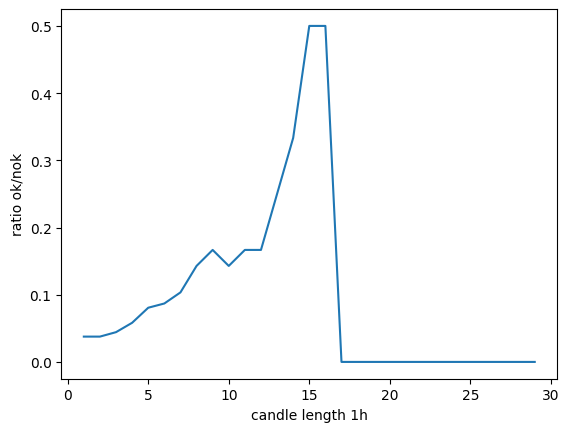

In [17]:
# PLOT DES RESULTATS
plt.plot(dfLengthResult['CANDLE_LENGTH'], dfLengthResult['RATIO'])
plt.ylabel("ratio ok/nok")
plt.xlabel("candle length 1h")
plt.show()

#### Longueurs des bougies 24h (NE SEMBLE PAS PERTINENT --> Dans ce cas pourquoi rester sur 8% ?)

In [59]:
print(df['DAY_PERCENT'].min())
print(df['DAY_PERCENT'].max())
print(df['DAY_PERCENT'].mean())

8.002
419.734
18.230830800405265


In [60]:
### On cherche a savoir la meilleure valeur pour le parametre 'bougie 24h'. 
# Ce parametre permet de trouver les cryptos gagnantes en filtrant les cryptos par rapport à leur augmentation sur 24h. 

# TEST DES LONGUEURS DE BOUGIE 24H
bestLengthOK = 0
bestLength = 0
bestLengthRatio = 0
dfLengthResult = pd.DataFrame(columns = ["DAY_PERCENT", 'OK', 'NOK', 'RATIO'])

# pour chaque longueur de bougie
for i in range(8, 100, 2): 
    dayPercent = i
    lengthOK = 0
    lengthNOK = 0
    lengthRatio = 0
    
    # pour chaque trade
    for index, row in df.iterrows():
        # On test la valeur bougie 1h afin de pouvoir comparé la combinaisaon daypercent / bougie 1h
        if (row["CANDLE_LENGTH"] >= 2):
        # si la longueur de bougie est comprise dans la section testé
            if (row["DAY_PERCENT"] >= dayPercent):
                # On vérifie le resultat du trade en fonction des parametre SLRatio et TPRatio
                if checkOtherRatios(row['ENTER_PRICE'], getDfFromString(row['TAB_PRICES']), 0.0005, 0.025):
                    lengthOK += 1
                else:
                    lengthNOK += 1
                
    if (lengthNOK == 0):
        lengthNOK = 1

    lengthRatio = lengthOK/(lengthNOK+lengthOK)
    # on garde le meilleur resultat
    if lengthRatio > bestLengthRatio:
        bestLengthRatio = lengthRatio
        bestLengthOK = lengthOK
        bestLength = dayPercent

    # on sauvegarde tout les resultats
    # dfLengthResult = dfLengthResult.append({"CANDLE_LENGTH": candleLengthUp - 0.01, 'OK': lengthOK, 'NOK': lengthNOK}, ignore_index=True)
    d = {"DAY_PERCENT": [dayPercent], 'OK': [lengthOK], 'NOK': [lengthNOK], 'RATIO': [lengthRatio]}
    dfToAppend = pd.DataFrame(data=d)
    dfLengthResult = pd.concat((dfLengthResult, dfToAppend), axis=0)

In [31]:
# PRINT DES DIFFERENTES LONGUEURS DE BOUGIES
print(dfLengthResult)
print("bestLength", bestLength)
print("bestLengthOK", bestLengthOK, "bestLengthRatio", bestLengthRatio)

  DAY_PERCENT  OK  NOK     RATIO
0           8  12  103  0.104348
0          10   8   73  0.098765
0          12   4   58  0.064516
0          14   4   49  0.075472
0          16   4   42  0.086957
0          18   3   32  0.085714
0          20   3   29  0.093750
0          22   3   22  0.120000
0          24   2   18  0.100000
0          26   2   16  0.111111
0          28   1   16  0.058824
0          30   0   14  0.000000
0          32   0   13  0.000000
0          34   0   13  0.000000
0          36   0   13  0.000000
0          38   0   13  0.000000
0          40   0   13  0.000000
0          42   0   13  0.000000
0          44   0   13  0.000000
0          46   0   13  0.000000
0          48   0   13  0.000000
0          50   0   13  0.000000
0          52   0   13  0.000000
0          54   0   13  0.000000
0          56   0   13  0.000000
0          58   0   13  0.000000
0          60   0   13  0.000000
0          62   0   13  0.000000
0          64   0   13  0.000000
0         

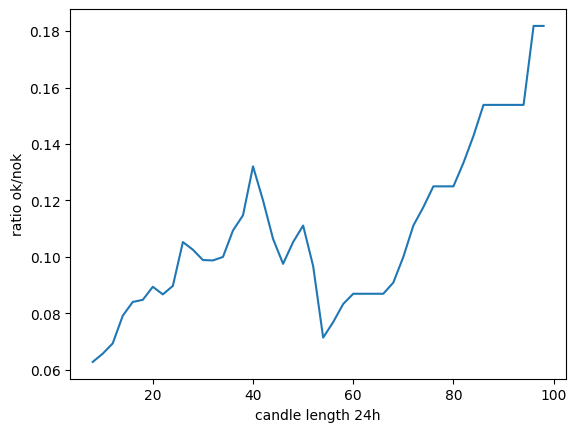

In [61]:
# PLOT DES RESULTATS
plt.plot(dfLengthResult['DAY_PERCENT'], dfLengthResult['RATIO'])
plt.ylabel("ratio ok/nok")
plt.xlabel("candle length 24h")
plt.show()

#### Nouvelle strategie suiveuse [ABORT]

In [162]:
# TESTS DES DIFFERENTS STOP LOSS / TAKE PROFIT AVEC LA STRATEGIE SUIVEUSE

dfResult = pd.DataFrame(columns = ['SL', 'TP', 'USDT'])

# pour chaque stop loss
for i in range(0, 6, 1):    
    SLRatio = i*0.001
    # pour chaque win
    for j in range(15, 26, 1):
        TPRatio = j*0.001
        usdt = 1000
        # pour chaque trade
        for index, row in df.iterrows():
            # On recupere le prix de sortie avec selon la stratégie                 
            outPrice = getPriceWithOtherRatioStrategieSuiveuse(row['ENTER_PRICE'], getDfFromString(row['TAB_PRICES']), SLRatio, TPRatio)
            if outPrice != None:
                gain = outPrice/row['ENTER_PRICE']
                usdt = usdt * gain
                usdt = usdt-usdt*0.001

        dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)

        print('SLRATIO: {0}, TPRATIO: {1}, USDT: {2}$'.format(SLRatio, TPRatio, usdt))

C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.015, USDT: 793.1618215581728$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.016, USDT: 782.4897727192312$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.017, USDT: 770.133023847776$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.018000000000000002, USDT: 772.5609951659134$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.019, USDT: 774.9943467912071$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.02, USDT: 759.9126016428535$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.021, USDT: 761.4033567562255$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.022, USDT: 762.8955726781381$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.023, USDT: 764.3892494085859$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.024, USDT: 748.6826542827731$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.0, TPRATIO: 0.025, USDT: 731.8672718448655$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.015, USDT: 875.8448163615504$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.016, USDT: 844.6689052645003$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.017, USDT: 811.3317656944735$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.018000000000000002, USDT: 771.65864562503$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.019, USDT: 763.4157681847963$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.02, USDT: 742.1022299409374$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.021, USDT: 719.551850629065$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.022, USDT: 683.3936154562987$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.023, USDT: 672.572532866682$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.024, USDT: 605.6626734635059$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.001, TPRATIO: 0.025, USDT: 553.0559000531691$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.015, USDT: 748.4460220159135$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.016, USDT: 737.9755213577624$
SLRATIO: 0.002, TPRATIO: 0.017, USDT: 711.164879759819$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)
C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.018000000000000002, USDT: 672.3527717427837$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.019, USDT: 648.1352881566029$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.02, USDT: 631.3599270239745$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.021, USDT: 615.1681560414105$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.022, USDT: 561.5415619963045$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.023, USDT: 553.705928598034$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.024, USDT: 467.5971039583929$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.002, TPRATIO: 0.025, USDT: 417.3924493441864$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.015, USDT: 759.5329692724437$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.016, USDT: 753.543371008911$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.017, USDT: 715.0749408646146$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.018000000000000002, USDT: 639.1500353378875$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.019, USDT: 635.7910455272969$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.02, USDT: 609.8711604364448$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.021, USDT: 585.3967500080381$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.022, USDT: 499.4899695546634$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.023, USDT: 483.7941124410952$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.024, USDT: 383.5115943113248$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.003, TPRATIO: 0.025, USDT: 327.1300077982491$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.015, USDT: 675.9269645843482$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.016, USDT: 675.4943326510105$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.017, USDT: 637.4788248821993$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.018000000000000002, USDT: 538.9432192528733$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.019, USDT: 547.7770211969084$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.02, USDT: 517.7699477369139$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.021, USDT: 484.7935746656233$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.022, USDT: 404.3088960419971$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.023, USDT: 400.1898437968467$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.024, USDT: 316.57876265050925$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.004, TPRATIO: 0.025, USDT: 252.2477660056375$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.015, USDT: 635.926444909418$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.016, USDT: 617.1481399715835$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.017, USDT: 583.2656043718392$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.018000000000000002, USDT: 478.4530999838616$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.019, USDT: 475.73211781060354$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.02, USDT: 451.42871777508367$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.021, USDT: 405.4216167722263$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.022, USDT: 323.6866202662405$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.023, USDT: 327.0927047034081$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


SLRATIO: 0.005, TPRATIO: 0.024, USDT: 248.98862222671139$
SLRATIO: 0.005, TPRATIO: 0.025, USDT: 198.39241012779482$


C:\Users\Dieu\AppData\Local\Temp\ipykernel_10944\2382257046.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResult = dfResult.append({'SL': SLRatio, 'TP': TPRatio, 'USDT': usdt}, ignore_index=True)


In [738]:
# PRINT DES MEILLEURS PARAMETRES
print(dfResult.sort_values(by=["USDT"], ascending=False).head(20))

       SL     TP        USDT
11  0.001  0.015  916.591243
17  0.001  0.021  896.919962
12  0.001  0.016  896.287803
13  0.001  0.017  895.837915
14  0.001  0.018  876.938430
2   0.000  0.017  875.353059
1   0.000  0.016  872.599471
0   0.000  0.015  867.250233
15  0.001  0.019  867.140965
6   0.000  0.021  865.430694
4   0.000  0.019  865.319258
5   0.000  0.020  863.736263
16  0.001  0.020  853.720138
9   0.000  0.024  850.972016
8   0.000  0.023  850.140988
3   0.000  0.018  845.985851
18  0.001  0.022  835.199063
7   0.000  0.022  831.859218
10  0.000  0.025  831.859218
22  0.002  0.015  827.964421


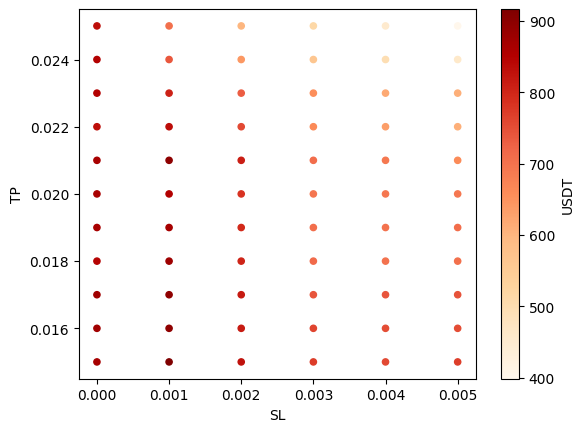

In [739]:
# PLOT DES MEILLEURS PARAMETRES
dfResult.plot.scatter(x='SL', y='TP', c='USDT', colormap='OrRd')
plt.show()